The main aim of this kernel is to use Linear regression in order to figure out how to maximize the Yearly Amount spent by the customers.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))
%matplotlib inline
# Any results you write to the current directory are saved as output.

['Ecommerce Customers.csv']


Importing data 

In [2]:
customer_df=pd.read_csv('../input/Ecommerce Customers.csv')
customer_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Lets explore the data

In [3]:
customer_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


1. customer spends beteen 33 and 40 minutes on the website compared to 12-15 minutes on the app

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


 **Lets Start Exploring the data to learn more..**

In [5]:
sns.set_palette('GnBu_r')

Comparing time spent on the site and amount of money spent yearly

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


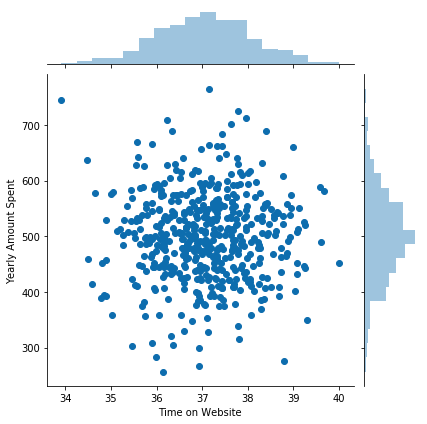

In [6]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customer_df )

**Conclusion**

there is no correlation between time spent in website and the yearly amount spent. (just a dense cluster)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


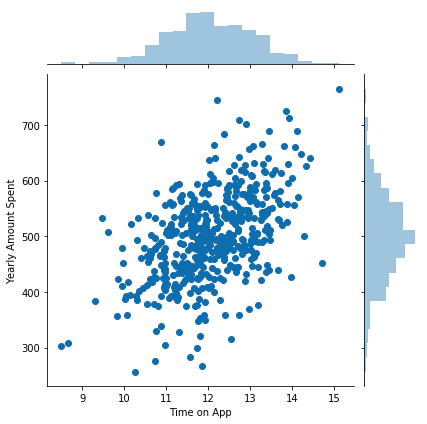

In [7]:
sns.jointplot(x= 'Time on App', y = 'Yearly Amount Spent', data = customer_df)

**Conclusion**

there is a strong positive correlation between time spent on app and the yearly amount spent

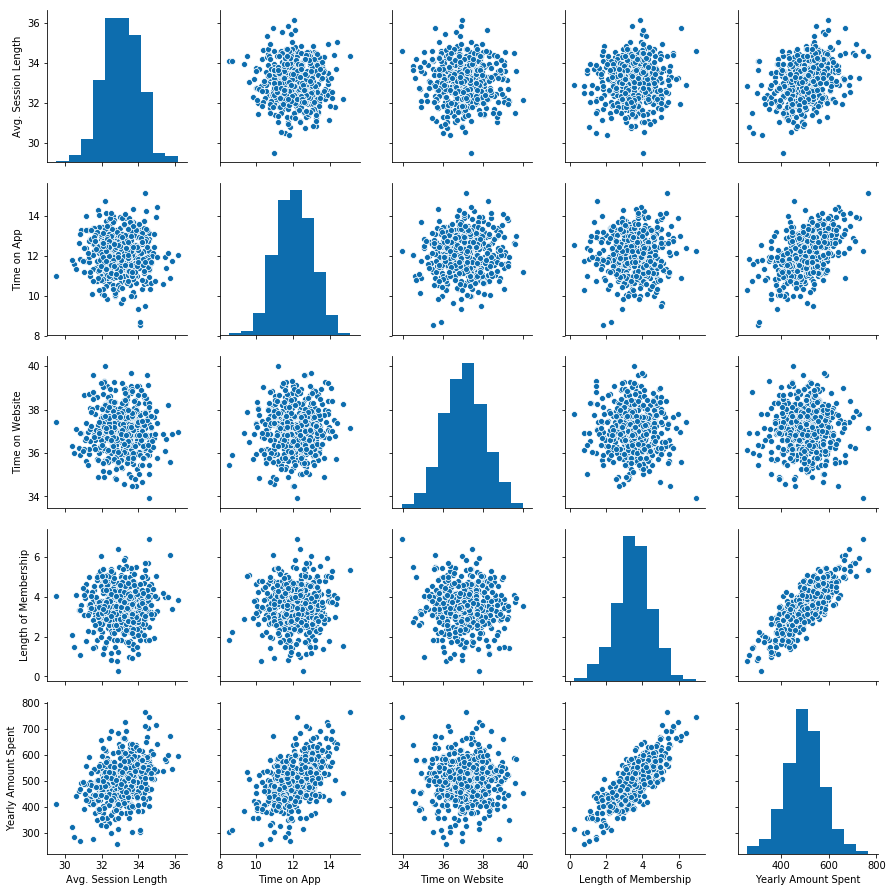

In [8]:
sns.pairplot(data = customer_df)

Pairplot to show the correlation with all variables in the dataset

Comparing time spent on the app and amount of money spent yearly

Lets Compare the time spent on the app and the length of membership

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


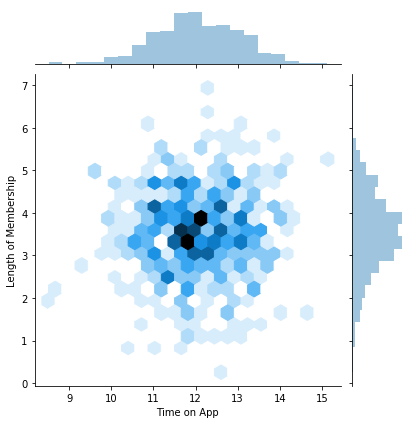

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customer_df,kind='hex')
plt.show()

Lets Compare the time spent on the website and the length of membership

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


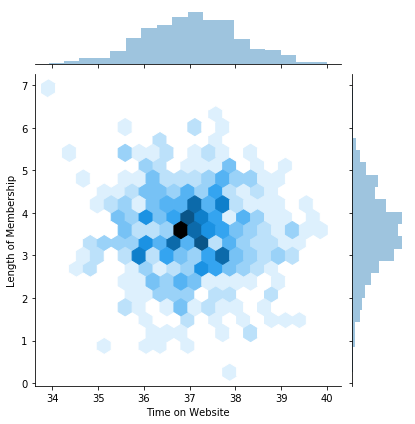

In [10]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=customer_df,kind='hex')
plt.show()

We could simply explore similar relationships across the data by creating pairplots

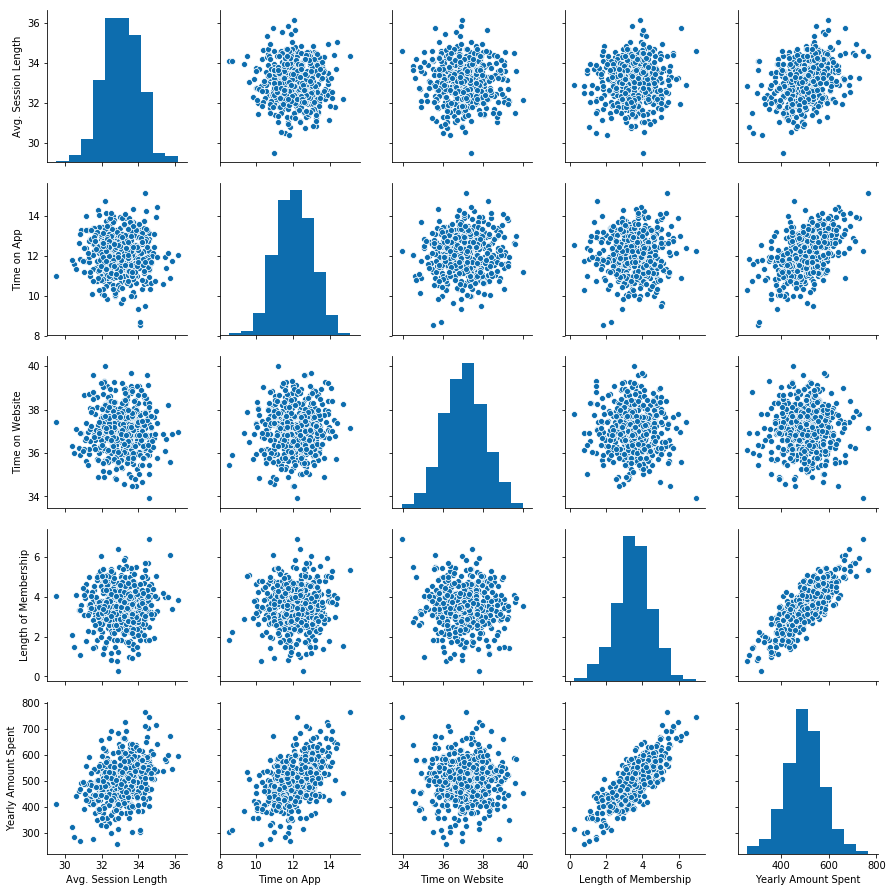

In [11]:
sns.pairplot(customer_df)
plt.show()

From the pairplot above we can observe that the length of membership is most closely related to the yearly amount spent by the consumers.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


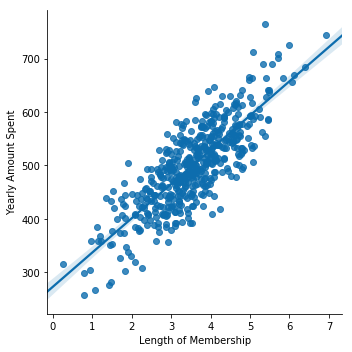

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customer_df)
plt.show()

Lets Split the data into training and testing set. We will set 'y' as the Yearly Amount Spent and 'X' will be the numerical features related to the customers from the data 

In [13]:
y=customer_df['Yearly Amount Spent']
X=customer_df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [14]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
# I have set random_state=42 in order to get the same output every time i run this kernel

In [15]:
#creating and training the model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
#coefficients of the model
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [25.88395636 38.51520571  0.57510724 61.49017177]


Now that we have our fit model lets see how well we can predict the test values

In [16]:
predictions =lm.predict(X_test)

Lets create a scatter plot of real test values vs the predicted values

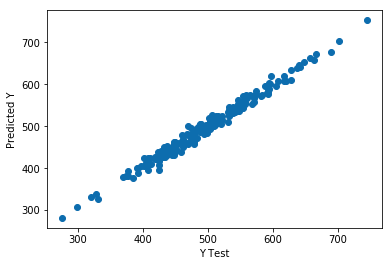

In [17]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Now lets evaluate the model

In [18]:
from sklearn import metrics
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMSE= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  8.24820696869837
MSE=  99.74067109516054
RMSE=  9.987025137405059


Now that we have a good model Lets explore the residuals

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


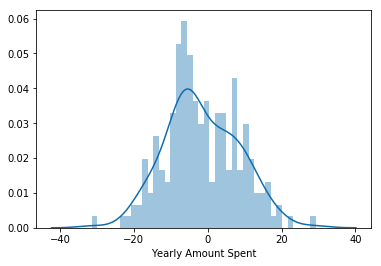

In [19]:
sns.distplot((y_test-predictions),bins=40);

Now lets figure out how we can boost the yearly amount spent by the customers

In [20]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'] )
cdf

,Coeff
Avg. Session Length,25.883956
Time on App,38.515206
Time on Website,0.575107
Length of Membership,61.490172


We can interpret this data to make certain observations, for example:-
If all other factors are kept constant then increasing the "Avg. Session Length" by one unit will increase the yearly amount spent by a customer by an estimate of \$26.

Similarly increasing "Time on App" by one unit increases yearly amount spent by \$38.5 whereas, increasing Time on Website by one unit increases yearly amount spent by only $0.6 approximately.

According to the data above the largest increase of approximately $61.5  is observed when the "Length of Membership" is increased by one unit.

Using the predictions above we can develop ways in order to increase yearly amount spent by the customers. We can improve the app experience so that the users spend more of their time on the app or we can also focus on the website and develop it so that it becomes as efficient as the app or we can focus on customer relationship so that people remain members for long periods of time.